# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 3: Samuele Voltan's notebook.</span>

In [2]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# FUNCTIONS
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

In [4]:
# DATA FILES
direct = np.loadtxt("data/lab03/ex03.1/ex03.1_direct.out")
discretized = np.loadtxt("data/lab03/ex03.1/ex03.1_discretized.out")

### <span style="color:red"> Exercise 03.1
By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=T$ via Monte Carlo the European call-option price, $C[S(T),T]$, and put-option price, $P[S(T),T]$:

1. By sampling directly the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>.

### <span style="color:orange"> Solution

The values calculated with the Black-Scholes analytic solution are
$$\begin{aligned}
\text{Call:}\quad 14&.975790778311286\\
\text{Put:}\quad 5&.4595325819072364
\end{aligned}$$

#### 1. Direct sample

In [5]:
title = ["Call Option", "Put Option"]
value = [14.975790778311286, 5.4595325819072364]
x = np.arange(100)

Call Option price = 14.9851810000 ± 0.0202325303
Put Option price = 5.4510452000 ± 0.0100861870


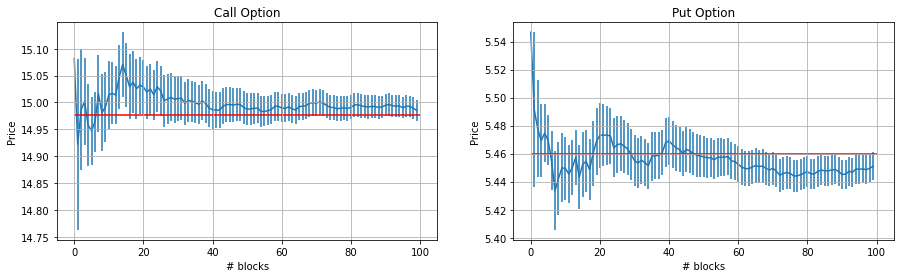

In [10]:
plt.figure(figsize=(15,4))
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    y = block_method(direct[:,i])
    plt.errorbar(x,y[:,0], yerr=y[:,1], zorder = 0)
    plt.hlines(value[i], 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# blocks")
    plt.ylabel(r"Price")
    plt.grid(True)
    print(title[i] + f" price = {y[-1, 0]:.10f} ± {y[-1, 1]:.10f}")
plt.plot();


The results are compatible with the theoretical prediction.

#### 2. Discretized sample

Call Option price = 14.9740980000 ± 0.0194181862
Put Option price = 5.4612448000 ± 0.0086393468


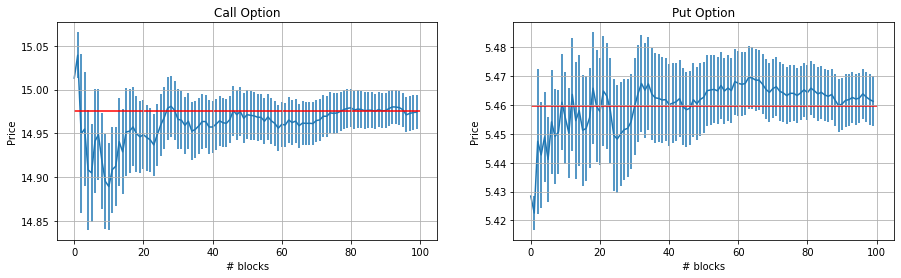

In [11]:
plt.figure(figsize=(15,4))
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    y = block_method(discretized[:,i])
    plt.errorbar(x,y[:,0], yerr=y[:,1], zorder = 0)
    plt.hlines(value[i], 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# blocks")
    plt.ylabel(r"Price")
    plt.grid(True)
    print(title[i] + f" price = {y[-1, 0]:.10f} ± {y[-1, 1]:.10f}")
plt.plot();

The results are compatible with the theoretical prediction.